In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [108]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [109]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


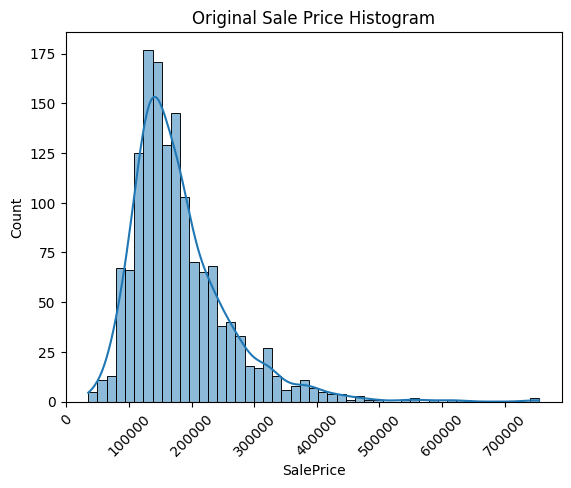

In [110]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

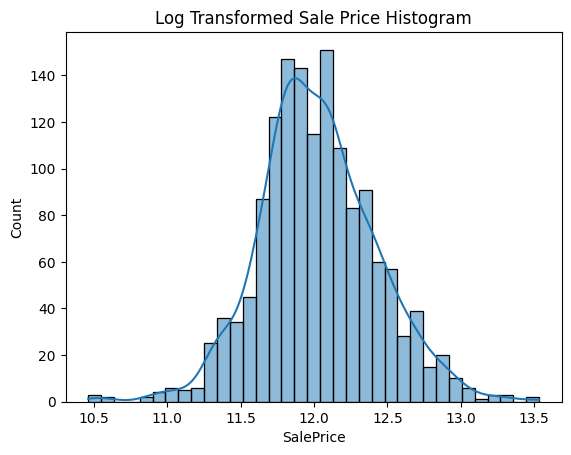

In [111]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [113]:
import numpy as np
import pandas as pd

# 1. SalePrice 로그 변환 (이전에 train.csv를 로드했다고 가정)
# 만약을 대비해 .apply(pd.to_numeric, errors='coerce')를 사용하여 비숫자 값을 NaN으로 변환 후 처리합니다.
house_df['SalePrice'] = house_df['SalePrice'].apply(pd.to_numeric, errors='coerce')
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# 2. Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
# Id는 삭제하고, Null이 많은 컬럼들은 train.csv에 존재하므로 삭제합니다.
# 안전을 위해 errors='ignore'를 추가하여, 혹시라도 없는 컬럼이 있어도 오류를 무시합니다.
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, 
              inplace=True, errors='ignore')

# 3. 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
# 💡 오류 해결: numeric_only=True를 명시하여 숫자형 열의 평균만 계산합니다.
house_df.fillna(house_df.mean(numeric_only=True), inplace=True)

# 4. Null 값이 있는 피처명과 타입을 추출 (이제 대부분 object 타입만 남아있을 것입니다)
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type ：\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type ：
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [114]:
print('get_dummies() 수행 전 데이터 Shape:', house_df .shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0] 
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 270)
## Null 피처의 Type :
 Series([], dtype: object)


In [115]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred) 
    rmse = np.sqrt(mse)
    print (model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3)) 
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [116]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, 
                                                    random_state=156)
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.01
Lasso 로그 변환된 RMSE: 0.018


[0.010481899993240711, 0.00997580081727197, 0.017959244690114895]

In [117]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n) 
    coef_low = coef.sort_values(ascending=False).tail(n) 
    return coef_high, coef_low

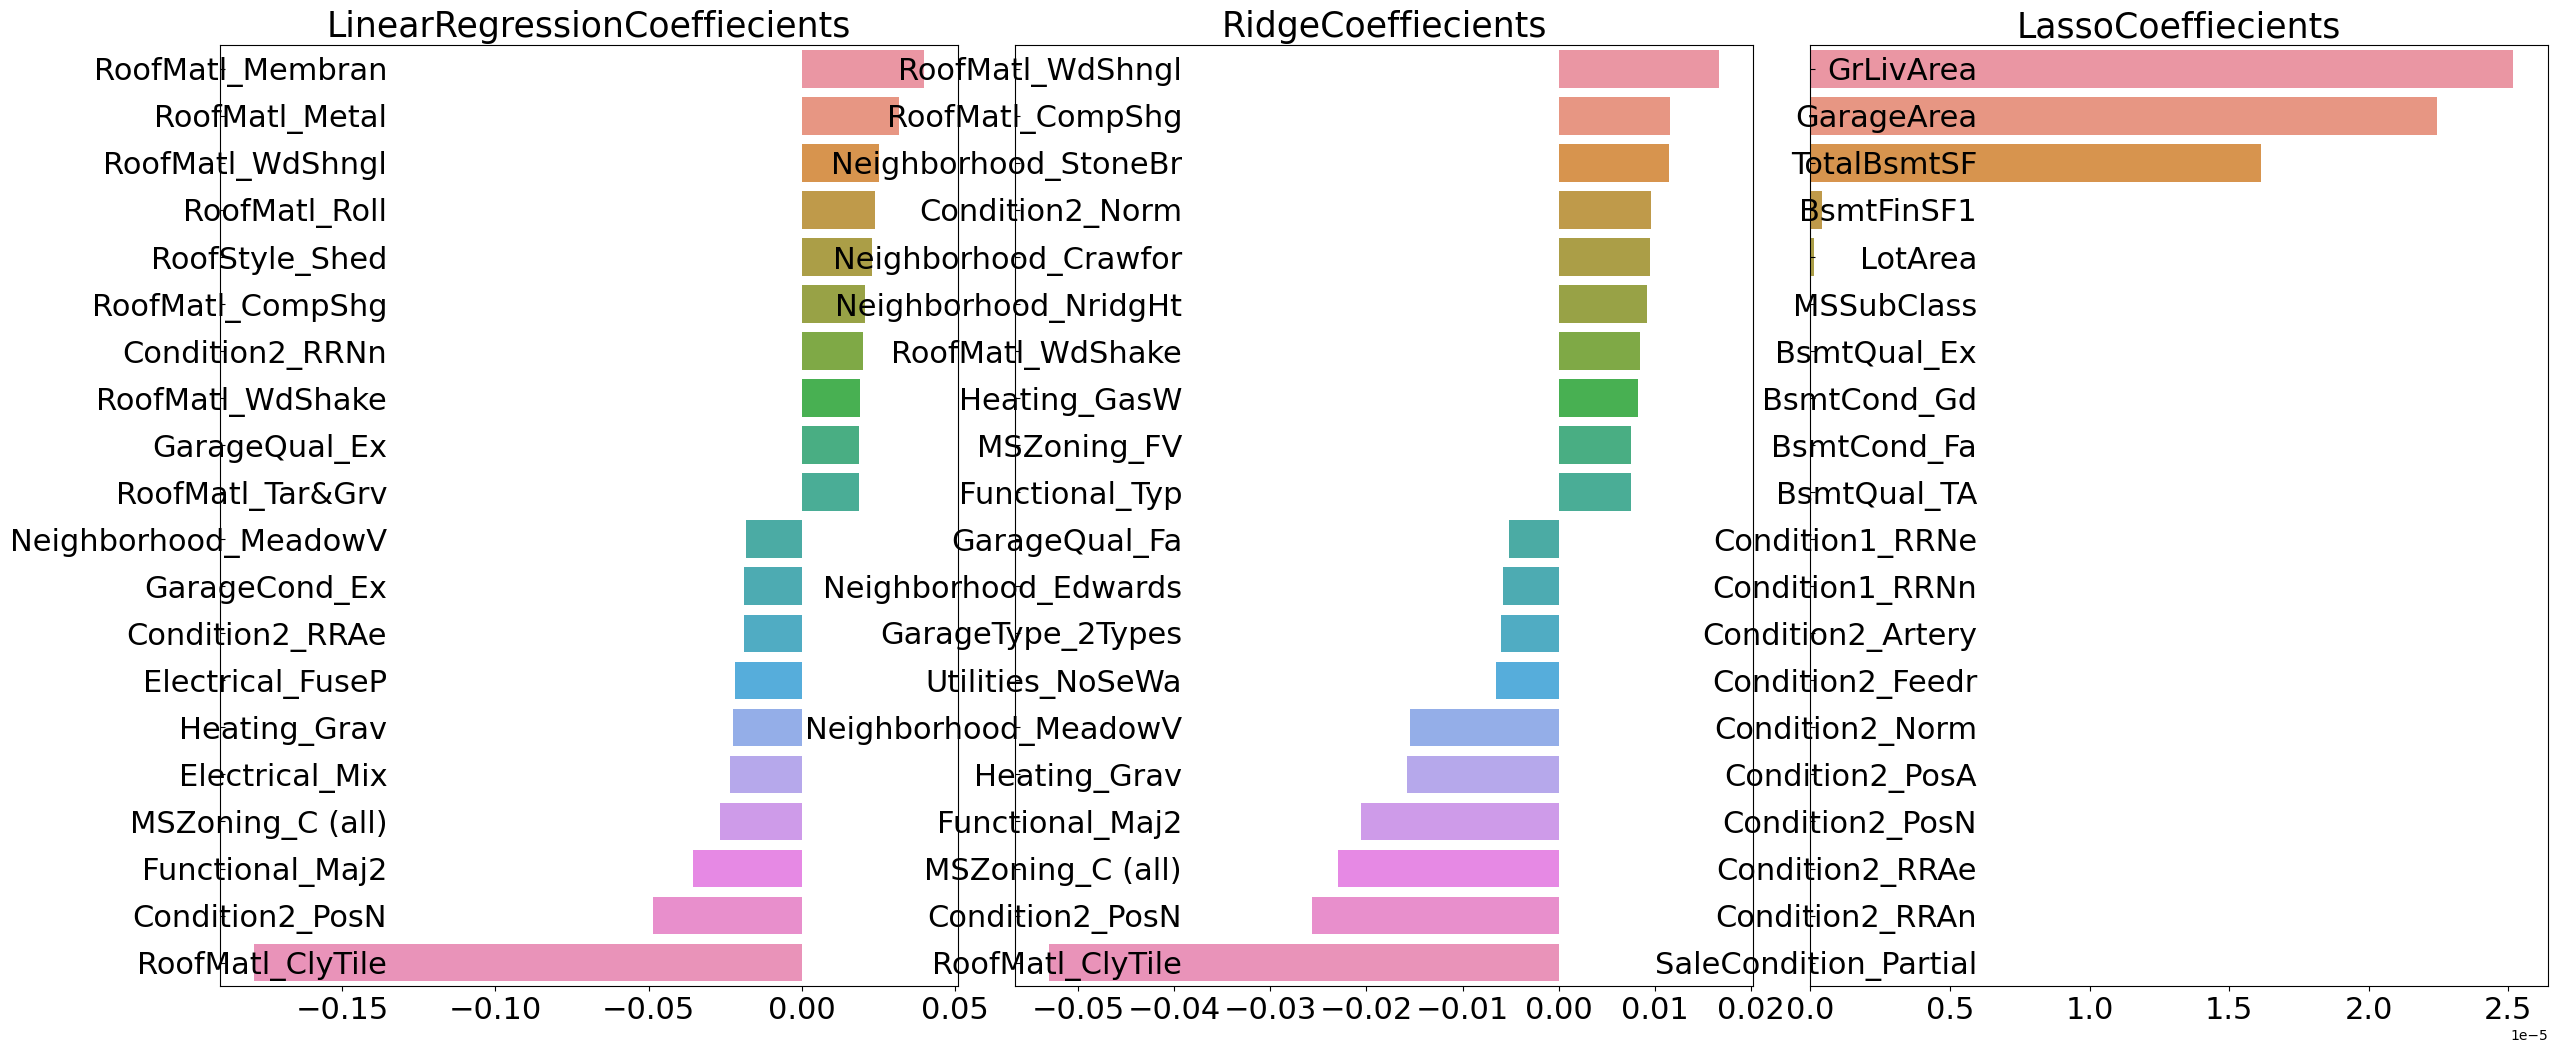

In [118]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model) 
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num] .set_title(model.__class__.__name__+'Coeffiecients', size=25)
        axs[i_num].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()): 
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [119]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력 
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5)) 
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3))) 
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 ridge_reg, lasso_reg 모델의 CV RMSE값 출력 
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트: [0.009 0.012 0.011 0.009 0.014]
Ridge CV 평균 RMSE 값: 0.011

Lasso CV RMSE 값 리스트: [0.016 0.019 0.018 0.017 0.022]
Lasso CV 평균 RMSE 값: 0.019


In [120]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_) 
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha：{2}' .format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] } 
print_best_params(ridge_reg, ridge_params) 
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.011, 최적 alpha：{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값:0.0126, 최적 alpha：{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.01
Ridge 로그 변환된 RMSE: 0.01
Lasso 로그 변환된 RMSE: 0.011


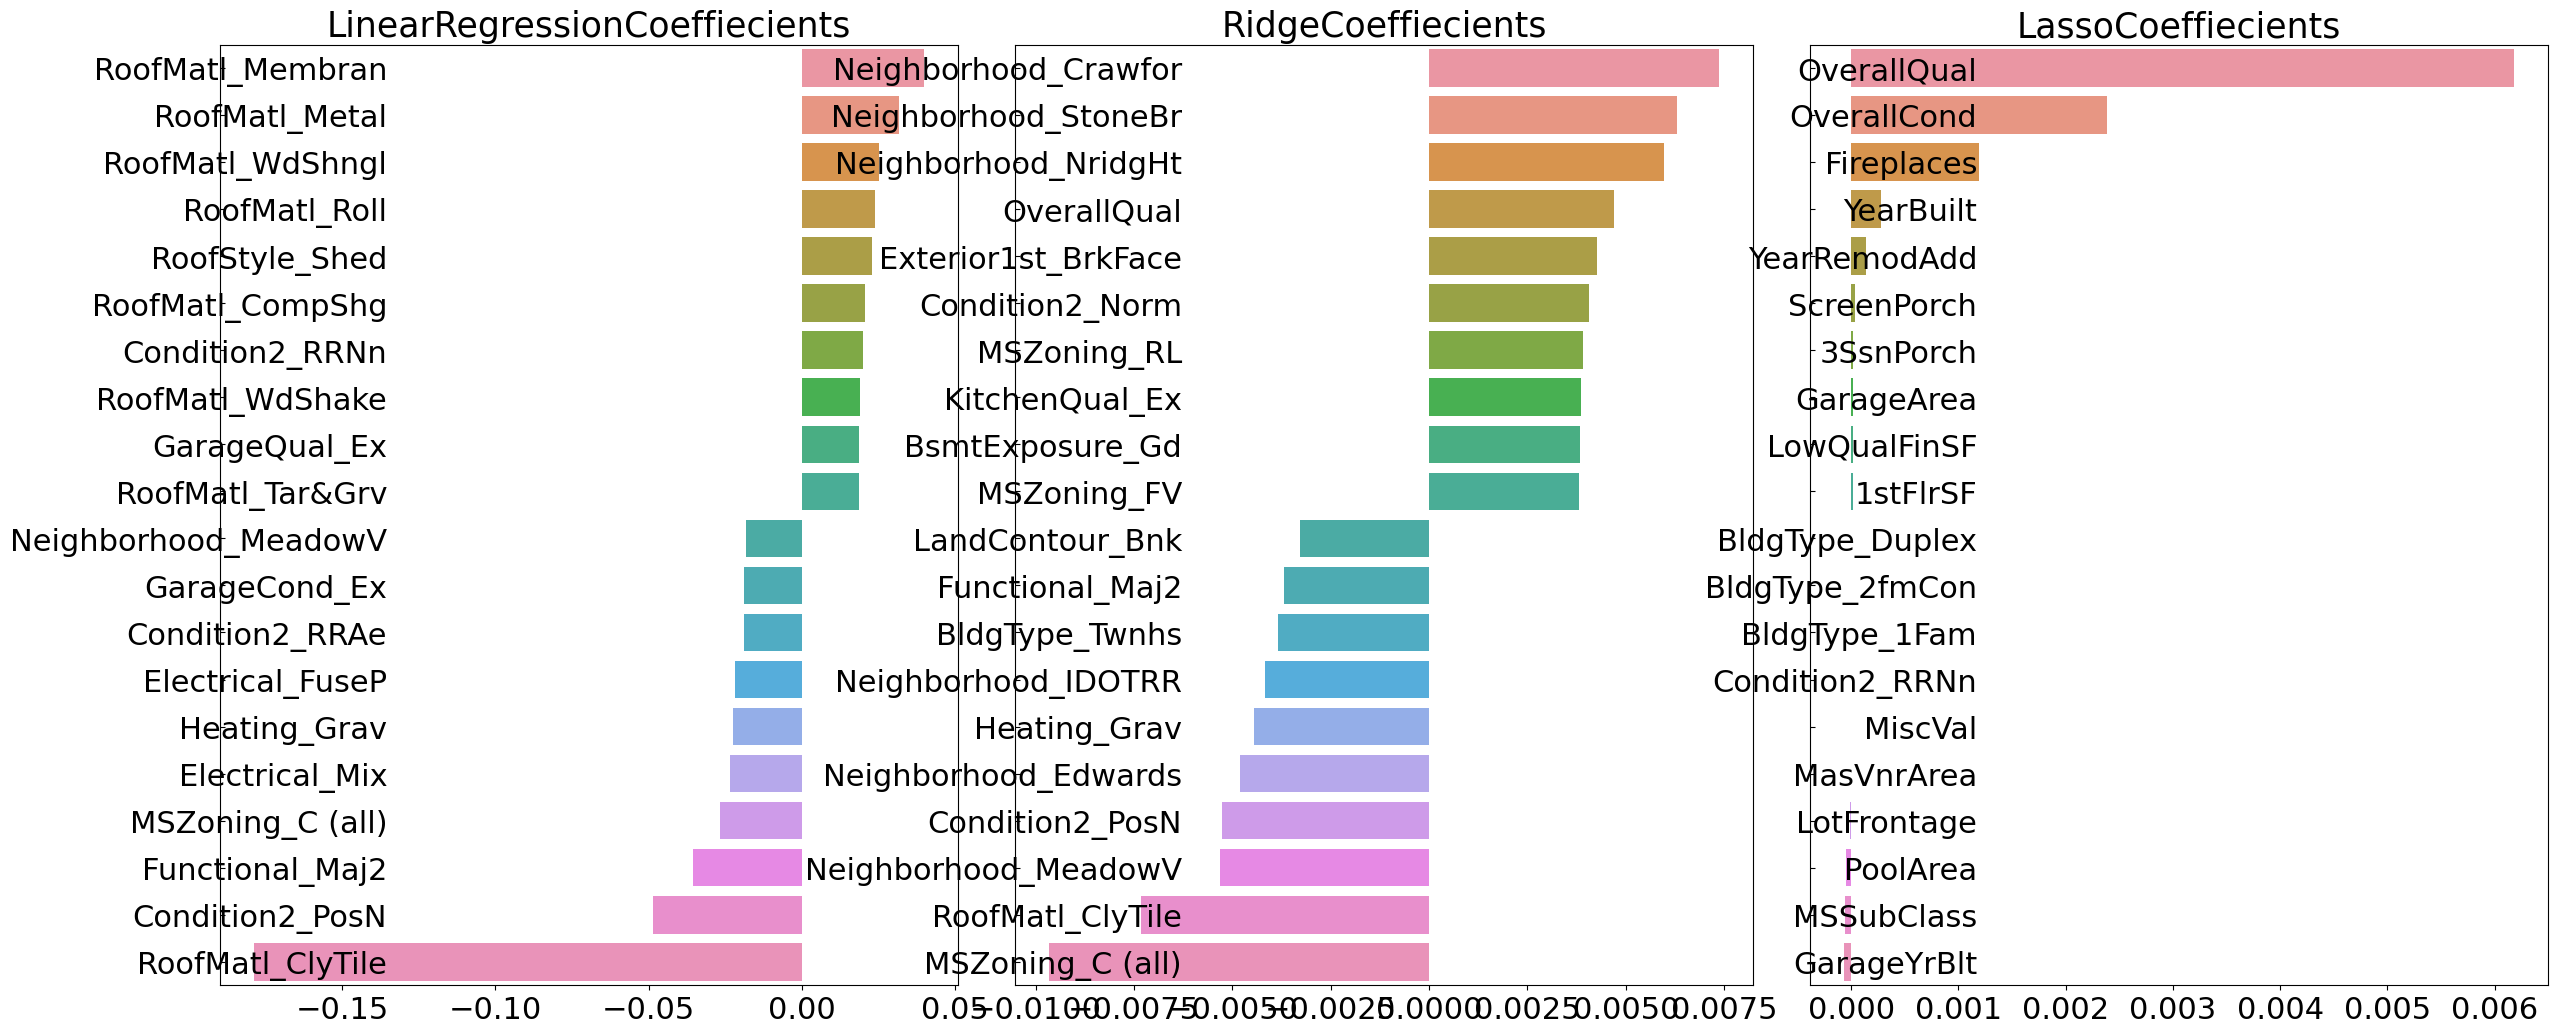

In [121]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train) 
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg] 
get_rmses(models)
# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [122]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1 ] 
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [123]:
 house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [124]:
# 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성 
house_df_ohe = pd.get_dummies(house_df) 
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, 
                                                    random_state=156)
# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] } 
print_best_params(ridge_reg, ridge_params) 
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.0099, 최적 alpha：{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값:0.0121, 최적 alpha：{'alpha': 0.001}


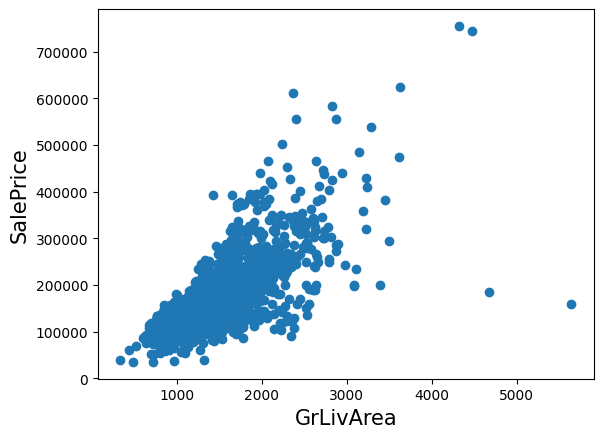

In [125]:
 plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
 plt.ylabel('SalePrice', fontsize=15)
 plt.xlabel('GrLivArea', fontsize=15)
 plt.show()

In [127]:
# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성 . 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000) 
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000) 
outlier_index = house_df_ohe[cond1 & cond2].index


print('이상치 레코드 index:', outlier_index.values) 
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제.
house_df_ohe.drop(outlier_index, axis=0, inplace=True) 
print('이상치 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

이상치 레코드 index: [ 523  691 1182 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 270)
이상치 삭제 후 house_df_ohe shape: (1456, 270)


In [131]:
 y_target = house_df_ohe['SalePrice']
 X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
 X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, 
                                                     random_state=156)

ridge_params = { 'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] } 
print_best_params(ridge_reg, ridge_params) 
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.0088, 최적 alpha：{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값:0.0114, 최적 alpha：{'alpha': 0.001}


In [133]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators': [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8) 
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값:0.0095, 최적 alpha：{'n_estimators': 1000}


In [148]:
from lightgbm import LGBMRegressor

lgbm_params = {' n_estimators': [1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1) 
print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3148
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 170
[LightGBM] [Info] Start training from score 2.565924
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ig

In [136]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key] 
        mse = mean_squared_error(y_test, pred_value) 
        rmse = np.sqrt(mse) 
        print('{0} 모델의 RMSE:{1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8) 
ridge_reg.fit(X_train, y_train) 
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(X_train, y_train) 

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test) 
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출 
pred = 0.4 * ridge_pred + 0.6 * lasso_pred 
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred, 
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RM요 값 출력 
get_rmse_pred(preds)

최종 혼합 모델의 RMSE:0.010361560802991329
Ridge 모델의 RMSE:0.00931950175070875
Lasso 모델의 RMSE:0.011916261294565128


In [140]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, njobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred 
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
get_rmse_pred(preds)

[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3164
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 169
[LightGBM] [Info] Start training from score 2.566739
[LightGBM] [Warning] Unknown parameter: njobs
최종 혼합 모델의 RMSE:0.009343955143658775
XGBM 모델의 RMSE:0.009735237273592143
LGBM 모델의 RMSE:0.00948114048673568


In [146]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기
    train_fold_pred = np. zeros ((X_train_n.shape[0], 1 ))
    test_pred = np.zeros((X_test_n.shape[0], n_folds)) 
    print(model.__class__.__name__, ' model 시작 ')
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출 
        print('\t 폴드 세트:', folder_counter, '시작') 
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

In [150]:
# get_stacking_base_datasets( )는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train. values 
X_test_n = X_test. values
y_train_n = y_train. values
 # 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5) 
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5) 
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5) 
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
Lasso  model 시작 
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBRegressor  model 시작 
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMRegressor  model 시작 
	 폴드 세트: 0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 157
[LightGBM] [Info] Start training from score 2.566895
	 폴드 세트: 1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [In

In [152]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1) 
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)
# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정. 
meta_model_lasso.fit(Stack_final_X_train, y_train) 
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final) 
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.02142061788306237
